# 3.3 使用Python實作軟投票(VotingClassifier)(分類)
## 參與軟投票的基學習器，必須能輸入預測機率
## voting='soft'

In [15]:
# --- 第 1 部分 ---
# 載入函式庫
from sklearn import datasets, naive_bayes, svm, neighbors
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
# 載入資料集
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

# 把資料分為訓練資料集與驗證資料集
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]


In [16]:
# --- 第 2 部分 ---
# 初始化基學習器
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = naive_bayes.GaussianNB()
learner_3 = svm.SVC(gamma=0.001, probability=True) # 設定probability=True以輸出預測機率


In [17]:
# --- 第 3 部分 ---
# 初始化投票分類器
voting = VotingClassifier([('KNN', learner_1),
                           ('NB', learner_2),
                           ('SVM', learner_3)],
                            voting='soft')

In [18]:
# --- 第 4 部分 ---
# 用訓練資料訓練分類器
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)


SVC(gamma=0.001, probability=True)

In [19]:
# --- 第 5 部分 ---
# 預測最可能的類別
soft_predictions = voting.predict(x_test)
soft_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [20]:
# --- 第 6 部分 ---
# 取得基學習器的預測
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)


In [21]:
# --- 第 7 部分 ---
# 基學習器的準確率
print('L1:', accuracy_score(y_test, predictions_1))
print('L2:', accuracy_score(y_test, predictions_2))
print('L3:', accuracy_score(y_test, predictions_3))
# 集成後模型的準確率
print('-'*30)
print('Soft Voting:', accuracy_score(y_test, soft_predictions))


L1: 0.94
L2: 0.96
L3: 0.88
------------------------------
Soft Voting: 0.94


## 視覺化軟投票的結果

In [22]:
# --- 第 1 部分 ---
# 載入函式庫
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn-paper')


In [23]:
# --- 第 2 部分 ---
# 得到驗證資料集的預測機愈
errors = y_test - soft_predictions

probabilities_1 = learner_1.predict_proba(x_test)
probabilities_2 = learner_2.predict_proba(x_test)
probabilities_3 = learner_3.predict_proba(x_test)


In [26]:
# --- 第 3 部分 ---
# 儲存每一筆被錯誤分類的資料
# 在每個基學習器上的預測機率
# 以及集成後的預測機率
x=[]
y_1=[]
y_2=[]
y_3=[]
y_avg=[]

for i in range(len(errors)):
    if not errors[i] == 0: # 有誤差即分類錯誤的資料
        x.append(i)
        y_1.append(probabilities_1[i][0])
        y_2.append(probabilities_2[i][0])
        y_3.append(probabilities_3[i][0])
        y_s = probabilities_1[i][0] + probabilities_2[i][0]
        y_s = y_s + probabilities_3[i][0]
        y_avg.append(y_s / 3)


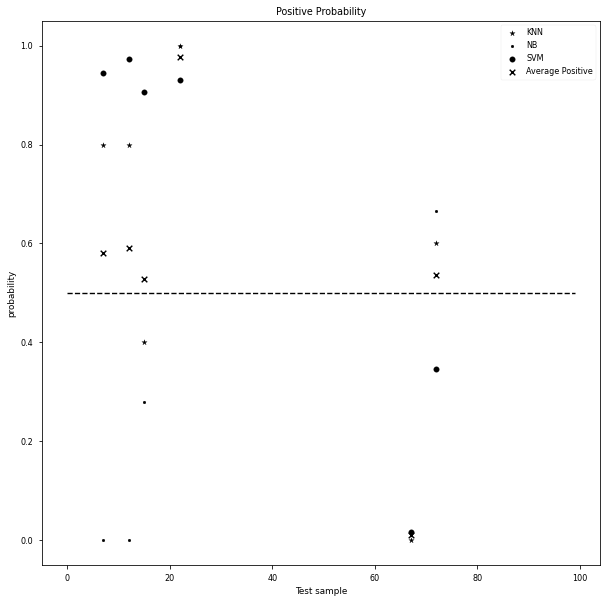

In [27]:
# --- 第 4 部分 ---
# 繪製在每個基學習器的預測機率
plt.figure(figsize = (10,10)) 
plt.scatter(x, y_1, marker='*', c='k', label='KNN', zorder=10)
plt.scatter(x, y_2, marker='.', c='k', label='NB', zorder=10)
plt.scatter(x, y_3, marker='o', c='k', label='SVM', zorder=10)
plt.scatter(x, y_avg, marker='x', c='k', label='Average Positive', zorder=10)

y = [0.5 for x in range(len(errors))]
plt.plot(y, c='k', linestyle='--')

plt.title('Positive Probability')
plt.xlabel('Test sample')
plt.ylabel('probability')
plt.legend()
plt.show()

## 將原先learner_3的支援向量機改成k近鄰演算法(k=50) 

L1: 0.94
L2: 0.96
L3: 0.95
------------------------------
Soft Voting: 0.97


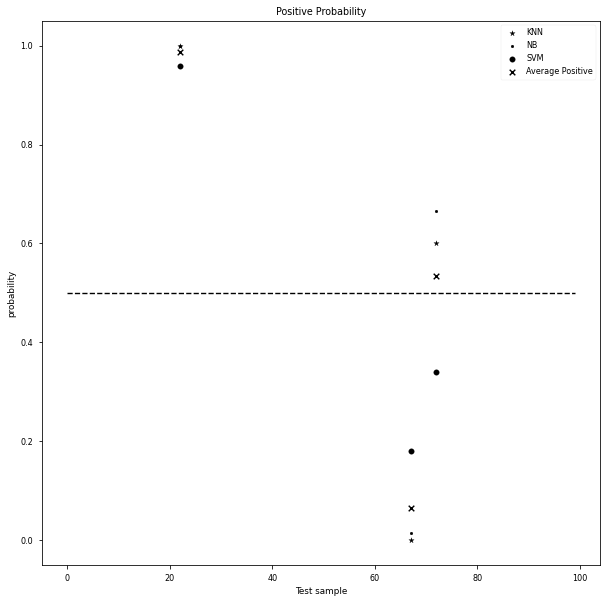

In [28]:
# 載入函式庫
from sklearn import datasets, naive_bayes, svm, neighbors
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
# 載入資料集
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

# 把資料分為訓練資料集與驗證資料集
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]

# 初始化基學習器
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = naive_bayes.GaussianNB()
learner_3 = neighbors.KNeighborsClassifier(n_neighbors=50)

# 初始化投票分類器
voting = VotingClassifier([('KNN1', learner_1),
                           ('KNN2', learner_2),
                           ('SVM', learner_3)],
                            voting='soft')

# 用訓練資料訓練分類器
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)

# 預測最可能的類別
soft_predictions = voting.predict(x_test)

# 取得基學習器的預測
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)

# 基學習器的準確率
print('L1:', accuracy_score(y_test, predictions_1))
print('L2:', accuracy_score(y_test, predictions_2))
print('L3:', accuracy_score(y_test, predictions_3))
# 集成後模型的準確率
print('-'*30)
print('Soft Voting:', accuracy_score(y_test, soft_predictions))

# 載入函式庫
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn-paper')

# 得到驗證資料集的預測機愈
errors = y_test - soft_predictions

probabilities_1 = learner_1.predict_proba(x_test)
probabilities_2 = learner_2.predict_proba(x_test)
probabilities_3 = learner_3.predict_proba(x_test)

# 儲存每一筆被錯誤分類的資料
# 在每個基學習器上的預測機率
# 以及集成後的預測機率
x=[]
y_1=[]
y_2=[]
y_3=[]
y_avg=[]

for i in range(len(errors)):
    if not errors[i] == 0:
        x.append(i)
        y_1.append(probabilities_1[i][0])
        y_2.append(probabilities_2[i][0])
        y_3.append(probabilities_3[i][0])
        y_avg.append((probabilities_1[i][0]+probabilities_2[i][0]+probabilities_3[i][0])/3)

# 繪製在每個基學習器的預測機率
plt.figure(figsize = (10,10)) 
plt.scatter(x, y_1, marker='*', c='k', label='KNN', zorder=10)
plt.scatter(x, y_2, marker='.', c='k', label='NB', zorder=10)
plt.scatter(x, y_3, marker='o', c='k', label='SVM', zorder=10)
plt.scatter(x, y_avg, marker='x', c='k', label='Average Positive', zorder=10)

y = [0.5 for x in range(len(errors))]
plt.plot(y, c='k', linestyle='--')

plt.title('Positive Probability')
plt.xlabel('Test sample')
plt.ylabel('probability')
plt.legend()
plt.show()